## Preparing Datasets

In [ ]:
# milk = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv',
#             index_col='Month', parse_dates=True)
# milk.columns = ['production']
# milk.index.name = 'month'
# milk.to_csv('../../datasets/Ch9/milk_production.csv')

# file = Path('../../datasets/Ch8/air_passenger.csv')
# df = pd.read_csv(file, index_col='date', parse_dates=True)
# df.to_csv('../../datasets/Ch9/air_passenger.csv')


# weather = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/nz_weather.csv',
#                      index_col='DATE', parse_dates=True)
# weather.to_csv('../../datasets/Ch9/weather.csv')

# pd.read_csv('https://api.covidtracking.com/v1/us/daily.csv', index_col='date', parse_dates=True).to_csv('../../datasets/Ch9/covid.csv')

# Smoothing Time Series Data

In [185]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tools.eval_measures import rmspe, rmse, aic, bic
from sklearn.metrics import mean_absolute_percentage_error as mape
plt.rcParams["figure.figsize"] = [12, 6]

In [1039]:
file = Path('../../datasets/Ch9/milk_production.csv')
milk = pd.read_csv(file, 
                   index_col='month', 
                   parse_dates=True)

In [1040]:
milk.shape

(168, 1)

In [1041]:
milk.head()

,production
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [1042]:
milk.tail()

,production
month,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


<AxesSubplot:xlabel='month'>

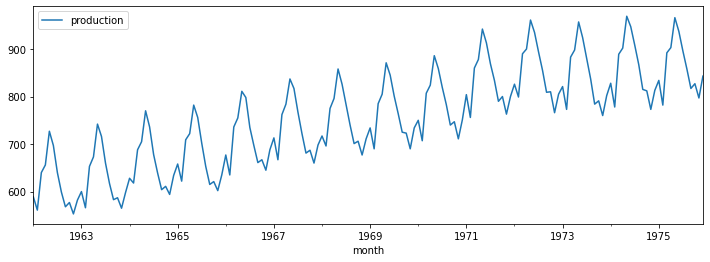

In [1043]:
milk.plot()

In [1044]:
x_train = milk.iloc[:-12]
x_test = milk.iloc[-12:]
print(x_train.shape[0],
     x_test.shape[0])

156 12


## Single Exponential Smoothing

In [1046]:
alphas = np.linspace(0.0, 1.0, 21)
results = {}
for alpha in alphas:
    alpha = round(alpha,2)
    ses = SimpleExpSmoothing(x_train['production'].values,
                            initialization_method='estimated').fit(
                             smoothing_level=alpha,
                             optimized=False)
    forecast  = ses.forecast(12)
    forecast = forecast.reshape(-1,1)
    score = {'rmspe': rmspe(x_test.values, forecast), 
             'rmse':rmse(x_test.values, forecast),
            'mape': mape(x_test.values, forecast),
            'aic': ses.aic, 
            'bic': ses.bic}
    
             
    results[alpha] = (ses,forecast, score)

In [1047]:
initial_score = results[0][2]['mape']
best_alpha = 0
for k,v in results.items():
    if v[2]['mape'] < initial_score:
        initial_score = v[2]['mape']
        best_alpha = k
    print(f'for alpha={k} RMSPE={v[2]["rmspe"]} RMSE={v[2]["rmse"]} MAPE={v[2]["mape"]} BIC={v[2]["bic"]}')
print(f'Best alpha: {best_alpha} with lowest MAPE score: {initial_score}')

for alpha=0.0 RMSPE=[2.62971886] RMSE=[232.27097681] MAPE=0.2589537678897573 BIC=1569.941430058617
for alpha=0.05 RMSPE=[0.64523399] RMSE=[58.79252278] MAPE=0.05237978970865403 BIC=1325.6941731853285
for alpha=0.1 RMSPE=[0.63050191] RMSE=[57.02407667] MAPE=0.052058994164454864 BIC=1304.4633253108248
for alpha=0.15 RMSPE=[0.64055462] RMSE=[58.25348] MAPE=0.05218593873256858 BIC=1299.7828400913638
for alpha=0.2 RMSPE=[0.66003037] RMSE=[60.41719003] MAPE=0.0529109628117193 BIC=1296.378858166979
for alpha=0.25 RMSPE=[0.68771145] RMSE=[63.27043501] MAPE=0.0545241127546493 BIC=1291.9174071251598
for alpha=0.3 RMSPE=[0.72064758] RMSE=[66.49878205] MAPE=0.057084832861440254 BIC=1286.0322694188244
for alpha=0.35 RMSPE=[0.75472802] RMSE=[69.73212624] MAPE=0.059954767485075555 BIC=1278.8895441431312
for alpha=0.4 RMSPE=[0.78622412] RMSE=[72.6584988] MAPE=0.06294317703324548 BIC=1270.8288085825714
for alpha=0.45 RMSPE=[0.81264717] RMSE=[75.08101809] MAPE=0.06558580143982731 BIC=1262.2264707266256


In [1048]:
results[best_alpha][0].summary()

Dep. Variable:,endog,No. Observations:,156
Model:,SimpleExpSmoothing,SSE,625970.583
Optimized:,False,AIC,1298.364
Trend:,None,BIC,1304.463
Seasonal:,None,AICC,1298.629
Seasonal Periods:,None,Date:,"Fri, 10 Dec 2021"
Box-Cox:,False,Time:,02:12:12
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
initial_level,636.80000,l.0,False


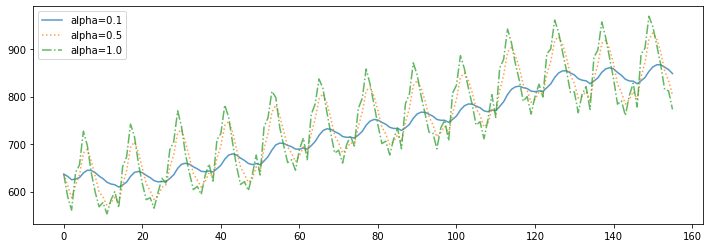

In [1049]:
styles = ['-', ':', '-.']
for i, style in zip([best_alpha, 0.5, 1.0], styles):
    plt.plot(results[i][0].fittedvalues, style, label=f'alpha={i}', alpha=0.75)
plt.legend()

In [1050]:
# import warnings
# warnings.filterwarnings('ignore')

In [1051]:
x_test['ses'] = results[best_alpha][1]

In [1052]:
x_train['ses'] = results[best_alpha][0].fittedvalues

In [1053]:
x_train.head()

,production,ses
month,,
1962-01-01,589,636.80000
1962-02-01,561,632.02000
1962-03-01,640,624.91800
1962-04-01,656,626.42620
1962-05-01,727,629.38358


In [1054]:
x_test.head()

,production,ses
month,,
1975-01-01,834,844.842813
1975-02-01,782,844.842813
1975-03-01,892,844.842813
1975-04-01,903,844.842813
1975-05-01,966,844.842813


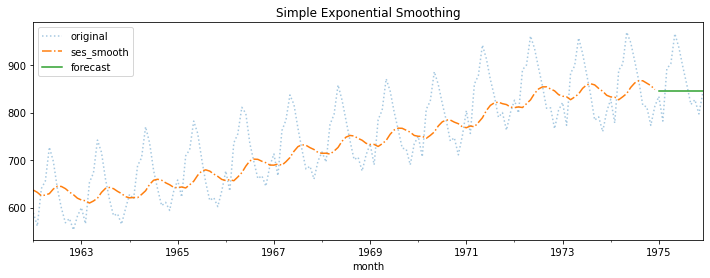

In [1055]:
ax = milk.plot(style=':', alpha=0.4, title=r'Simple Exponential Smoothing')
x_train['ses'].plot(style='-.', ax=ax)
x_test['ses'].plot(ax=ax)
plt.legend(['original','ses_smooth', 'forecast'])
plt.show()


**Automated Optimization**

In [1056]:
ses = SimpleExpSmoothing(x_train['production'].values,
                        initialization_method='estimated').fit(
                        optimized=True,
                        use_brute=True)
ses.summary()

Dep. Variable:,endog,No. Observations:,156
Model:,SimpleExpSmoothing,SSE,314995.457
Optimized:,True,AIC,1191.231
Trend:,None,BIC,1197.331
Seasonal:,None,AICC,1191.496
Seasonal Periods:,None,Date:,"Fri, 10 Dec 2021"
Box-Cox:,False,Time:,02:12:19
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9975314,alpha,True
initial_level,588.25764,l.0,True


In [1057]:
x_test['ses_auto'] = ses.forecast(12)
x_train['ses_auto'] = ses.fittedvalues
alpha = ses.params['smoothing_level']
alpha

0.9975314332855143

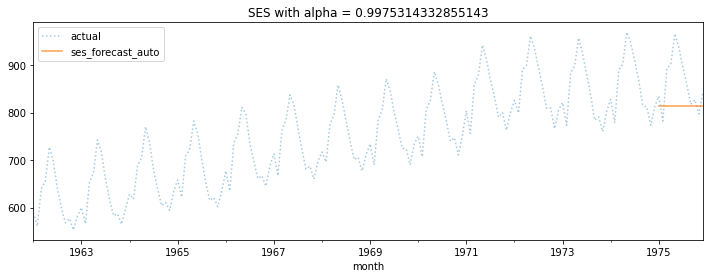

In [1058]:
# ax = x_train['ses'].plot(style=':')
# x_test['ses'].plot(ax=ax, style=':')
# plt.legend(['ses', 'ses_auto', 'ses_forecast', 'ses_forecast_auto'])
# x_train['ses_auto'].plot(style='-', alpha=0.75)
ax = milk.plot(style=':', 
               alpha=0.4, 
               title=f'SES with alpha = {alpha}')
x_test['ses_auto'].plot(ax=ax, style='-', alpha=0.75)
plt.legend(['actual', 'ses_forecast_auto'])
plt.show()


## Double/Holt

In [1059]:
holt = Holt(x_train['production'].values, 
            initialization_method='estimated',
            damped_trend=True, 
            exponential=True).fit(
                                optimized=True,
                                use_brute=True)
holt.summary()

Dep. Variable:,endog,No. Observations:,156
Model:,Holt,SSE,317390.789
Optimized:,True,AIC,1198.413
Trend:,Multiplicative,BIC,1213.662
Seasonal:,None,AICC,1199.170
Seasonal Periods:,None,Date:,"Fri, 10 Dec 2021"
Box-Cox:,False,Time:,02:12:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.0001000,beta,True


In [1060]:
holt.params

{'smoothing_level': 0.9949999828967064,
 'smoothing_trend': 0.00010002236814638275,
 'smoothing_seasonal': nan,
 'damping_trend': 0.9900000001124227,
 'initial_level': 636.7999979431914,
 'initial_trend': 1.0097315834389828,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

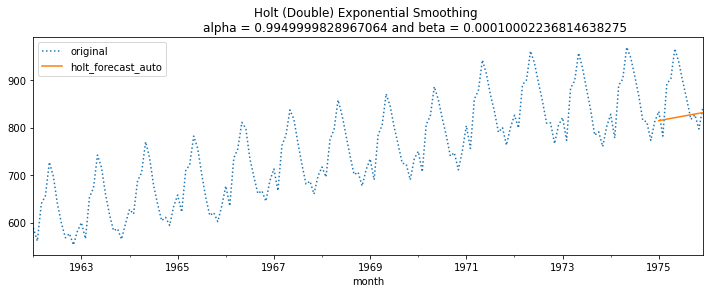

In [1061]:
# x_train['holt_auto'].plot(style='-', ax=ax)
x_test['holt_auto'] = holt.forecast(12)
x_train['holt_auto'] = holt.fittedvalues
alpha = holt.params['smoothing_level']
beta = holt.params['smoothing_trend']

ax = milk.plot(style=':', 
               title=f'''Holt (Double) Exponential Smoothing 
                        alpha = {alpha} and beta = {beta}''')
x_test['holt_auto'].plot(ax=ax)
plt.legend(['original','holt_forecast_auto'])
plt.show()


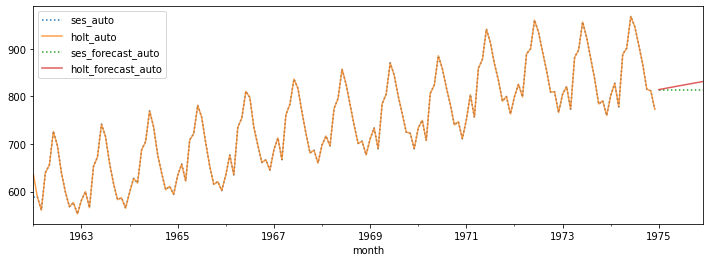

In [1062]:
ax = x_train['ses_auto'].plot(style=':')
x_train['holt_auto'].plot(style='-', alpha=0.75) 
x_test['ses_auto'].plot(ax=ax, style=':')
x_test['holt_auto'].plot(ax=ax, style='-', alpha=0.75)
plt.legend(['ses_auto', 'holt_auto', 'ses_forecast_auto', 'holt_forecast_auto'])
plt.show()

## Holt-Winters (Triple Exponential Smoothing)

In [1063]:
from itertools import product
trend, seasonal, periods = (['mul', 'add'], ['mul', 'add'], [3, 6, 12])
combos = [i for i in product(*[trend, seasonal, periods])]
combos

[('mul', 'mul', 3),
 ('mul', 'mul', 6),
 ('mul', 'mul', 12),
 ('mul', 'add', 3),
 ('mul', 'add', 6),
 ('mul', 'add', 12),
 ('add', 'mul', 3),
 ('add', 'mul', 6),
 ('add', 'mul', 12),
 ('add', 'add', 3),
 ('add', 'add', 6),
 ('add', 'add', 12)]

In [1064]:
from sklearn.model_selection import ParameterGrid
for item in ParameterGrid({'trend': trend, 
                           'seasonal': seasonal, 
                           'periods':periods}):
    print(item)

{'periods': 3, 'seasonal': 'mul', 'trend': 'mul'}
{'periods': 3, 'seasonal': 'mul', 'trend': 'add'}
{'periods': 3, 'seasonal': 'add', 'trend': 'mul'}
{'periods': 3, 'seasonal': 'add', 'trend': 'add'}
{'periods': 6, 'seasonal': 'mul', 'trend': 'mul'}
{'periods': 6, 'seasonal': 'mul', 'trend': 'add'}
{'periods': 6, 'seasonal': 'add', 'trend': 'mul'}
{'periods': 6, 'seasonal': 'add', 'trend': 'add'}
{'periods': 12, 'seasonal': 'mul', 'trend': 'mul'}
{'periods': 12, 'seasonal': 'mul', 'trend': 'add'}
{'periods': 12, 'seasonal': 'add', 'trend': 'mul'}
{'periods': 12, 'seasonal': 'add', 'trend': 'add'}


In [1066]:
results = {}
for i, (t, s, p )in enumerate(combos):
    exp = ExponentialSmoothing(x_train['production'].values, 
                           initialization_method='estimated',
                           seasonal_periods=p, 
                           trend=t, 
                           seasonal=s).fit(optimized= True, use_brute = True)
    
    forecast = exp.forecast(12)
    scores = {
        'rmse': rmse(x_test['production'].values, forecast),
        'mape': mape(x_test['production'].values, forecast),
        'rmspe': rmspe(x_test['production'].values, forecast),
        'aic': exp.aic,
        'bic': exp.bic
    }
    results[i+1] = [exp, forecast, scores]

In [1067]:
initial_score = results[1][2]['aic']
model = 0
for k,v in results.items():
    if v[2]['aic'] < initial_score:
        initial_score = v[2]['aic']
        model = k
    print(f'for model #{k} RMSPE={v[2]["rmspe"]} RMSE={v[2]["rmse"]} MAPE={v[2]["mape"]} BIC={v[2]["bic"]}')
print(f'Best model: {model} with lowest AIC score: {initial_score}')

for model #1 RMSPE=0.7139034718437772 RMSE=64.30332421202307 MAPE=0.0632015784783375 BIC=1223.4319478973077
for model #2 RMSPE=0.9489871620253245 RMSE=86.33994674361603 MAPE=0.08213666778125822 BIC=1203.01638200421
for model #3 RMSPE=0.20503801685538944 RMSE=18.642363342163645 MAPE=0.017346393831080897 BIC=715.4901236646411
for model #4 RMSPE=0.8239282254825636 RMSE=76.41990749598845 MAPE=0.0633481032219969 BIC=1222.793089172705
for model #5 RMSPE=0.9647067767147738 RMSE=87.84428549144195 MAPE=0.08299185715827202 BIC=1206.8167023615295
for model #6 RMSPE=0.14033210386645636 RMSE=12.226989490353311 MAPE=0.012452841594356815 BIC=694.7876826500933
for model #7 RMSPE=0.855574369851304 RMSE=79.16254592505456 MAPE=0.06790041878848643 BIC=1221.916910994505
for model #8 RMSPE=1.0329680089123414 RMSE=93.63130869978829 MAPE=0.09039084631474009 BIC=1202.5994158938138
for model #9 RMSPE=0.20004033594782208 RMSE=18.14192035579706 MAPE=0.017109294827243098 BIC=714.8542379756685
for model #10 RMSPE=0

In [1068]:
results[3][0].summary()

Dep. Variable:,endog,No. Observations:,156
Model:,ExponentialSmoothing,SSE,9121.570
Optimized:,True,AIC,666.692
Trend:,Multiplicative,BIC,715.490
Seasonal:,Multiplicative,AICC,671.685
Seasonal Periods:,12,Date:,"Fri, 10 Dec 2021"
Box-Cox:,False,Time:,02:12:54
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,2.7542e-10,beta,True


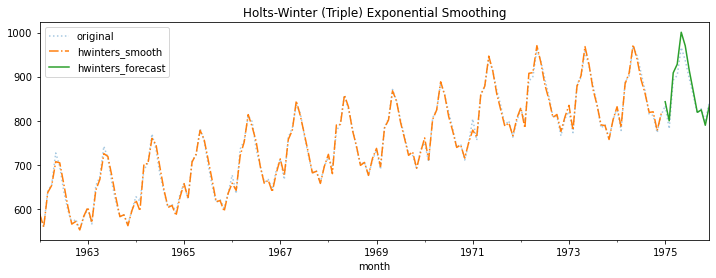

In [1069]:
model = results[3][0]
x_test['hwinters'] = model.forecast(12)
x_train['hwinters'] = model.fittedvalues

ax = milk.plot(style=':', alpha=0.4, title=f'Holts-Winter (Triple) Exponential Smoothing')
x_train['hwinters'].plot(style='-.', ax=ax)
x_test['hwinters'].plot(ax=ax)
plt.legend(['original','hwinters_smooth', 'hwinters_forecast'])
plt.show()

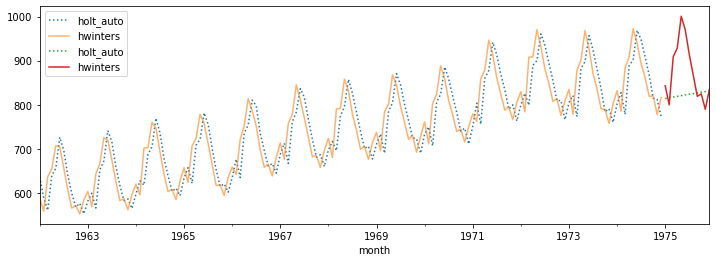

In [1070]:
ax = x_train['holt_auto'].plot(style=':')
x_train['hwinters'].plot(ax=ax, style='-', alpha=0.60)
x_test['holt_auto'].plot(ax=ax, style=':')
x_test['hwinters'].plot(ax=ax, style='-')

plt.legend()

**automated**

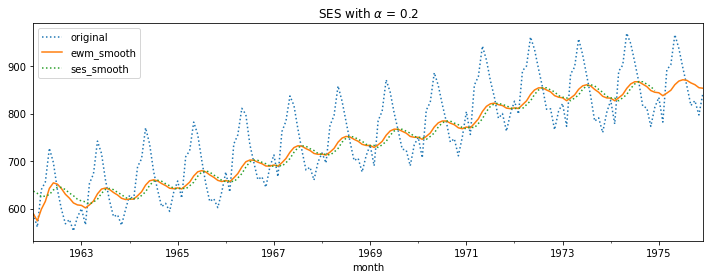

In [1071]:
ax = milk.plot(style=':', title=r'SES with $\alpha$ = 0.2')
milk.ewm(alpha=0.1).mean().plot(style='-', ax=ax)
x_train['ses'].plot(ax=ax, style=':')
plt.legend(['original','ewm_smooth', 'ses_smooth'])
plt.show()

In [1073]:
exp = ExponentialSmoothing(x_train['production'].values).fit(optimized= True, use_brute = True)
exp.summary()

Dep. Variable:,endog,No. Observations:,156
Model:,ExponentialSmoothing,SSE,314934.000
Optimized:,True,AIC,1191.201
Trend:,None,BIC,1197.301
Seasonal:,None,AICC,1191.466
Seasonal Periods:,None,Date:,"Fri, 10 Dec 2021"
Box-Cox:,False,Time:,02:13:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,589.00000,l.0,True


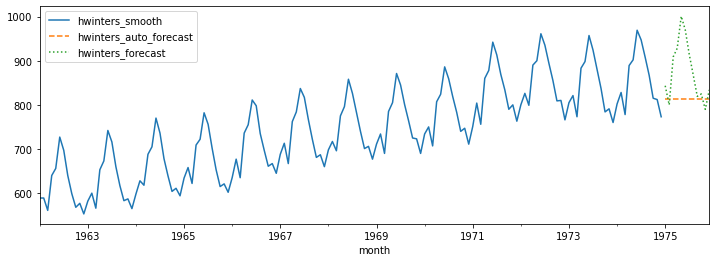

In [1074]:
x_train['hwinters_auto'] = exp.fittedvalues
x_test['hwinters_auto'] = exp.forecast(12)
ax = x_train['hwinters_auto'].plot(label='hwinters_smooth')
x_test['hwinters_auto'].plot(ax=ax, label='hwinters_auto_forecast', style='--')
x_test['hwinters'].plot(ax=ax, label='hwinters_forecast', style=':')
plt.legend()

## There is more

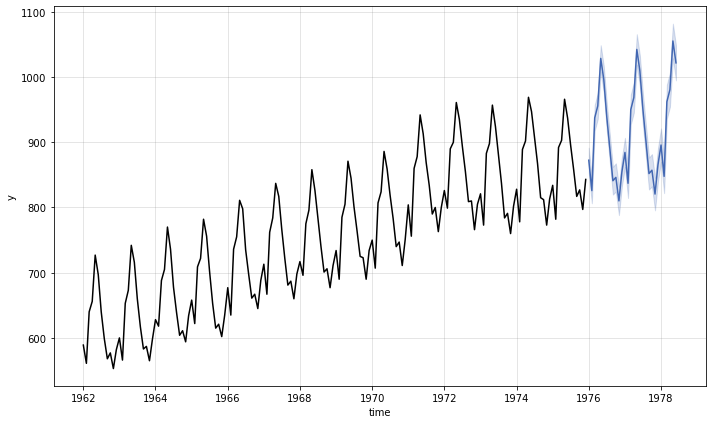

In [1075]:
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
from kats.consts import TimeSeriesData
warnings.simplefilter(action='ignore')

ts = milk.reset_index() 
ts.columns = ['time','value']
ts = TimeSeriesData(ts)

params = HoltWintersParams(
            trend="add",
            damped=True,
            seasonal="mul",
            seasonal_periods=12,
        )
m = HoltWintersModel(
    data=ts, 
    params=params)

m.fit()
fcst = m.predict(steps=30, alpha = 0.1)
m.plot()

# Building AutoRegressive and Moving Average Models

In [1292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmspe, rmse, aic, bic
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from pathlib import Path

plt.rcParams["figure.figsize"] = [12, 4]

<AxesSubplot:xlabel='month'>

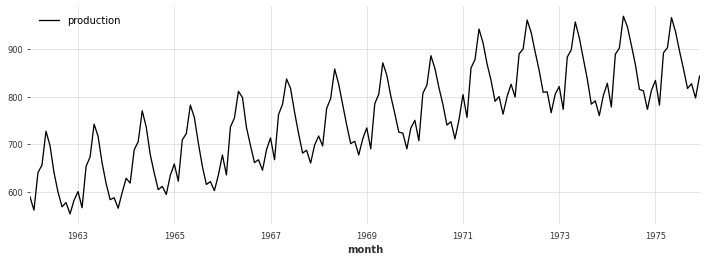

In [1293]:
file = Path('../../datasets/Ch9/milk_production.csv')
milk = pd.read_csv(file, 
                   index_col='month', 
                   parse_dates=True)
milk.plot()

In [1294]:
milk.head()

,production
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [1295]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


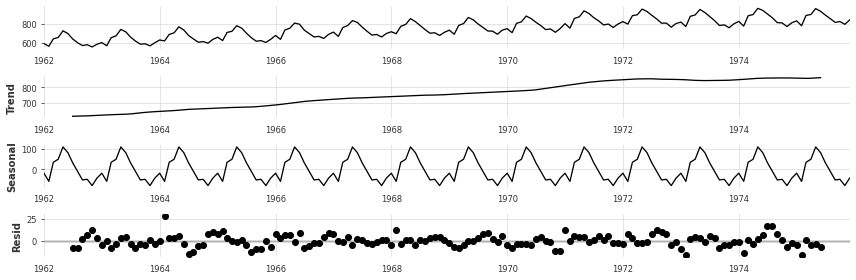

In [1331]:
results = seasonal_decompose(milk, model='addiditive', freq=12)
results.plot()
plt.show()

In [1332]:
# detrending and removing seasonal components
decomp = seasonal_decompose(milk.production,
                            model='additive',
                            freq=12)

# remove trend and seasonality
milk_decomp = decomp.trend.dropna()

In [1297]:
milk.shape

(168, 1)

In [1298]:
adfuller(milk)

(-1.3038115874221294,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

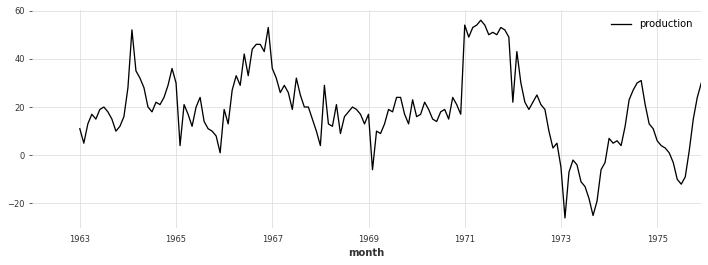

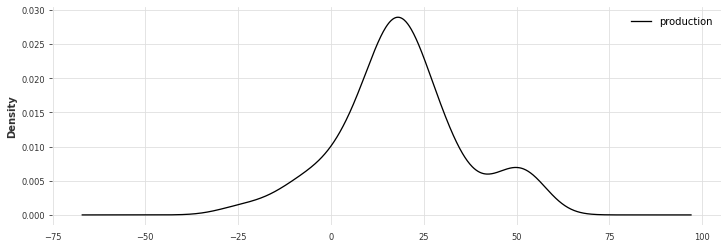

In [1341]:
milk_diff = milk.diff(periods=12)
milk_diff.plot()
plt.show()

milk_diff.plot(kind='kde')
plt.show()

In [1299]:
# df_log = np.log(milk)
milk_d = np.log(milk) - np.log(milk).shift()
milk_d.dropna(inplace=True)
# milk_d = milk.diff(1).diff(1).dropna()
adfuller(milk_d)

(-2.9066334238689766,
 0.044582040407215785,
 12,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 -891.3948747677152)

<AxesSubplot:xlabel='month'>

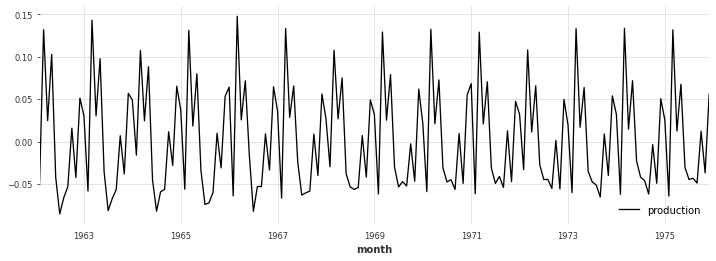

In [1300]:
milk_d.plot()

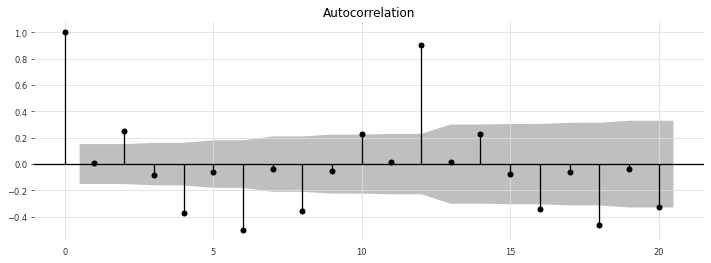

In [1301]:
plot_acf(milk_d, lags=20, alpha=0.05)
plt.show()

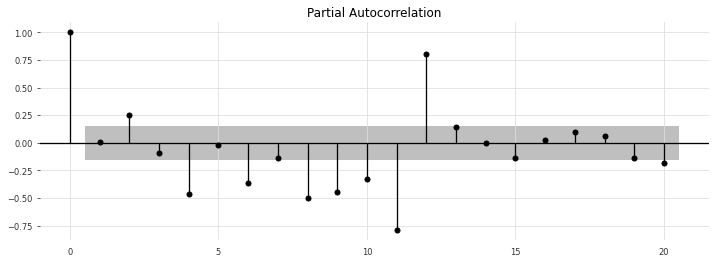

In [1302]:
plot_pacf(milk_d, lags=20, alpha=0.05, method='ols')
plt.show()

In [1303]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [1304]:
acorr_ljungbox(milk_d,lags=12, return_df=True)

,lb_stat,lb_pvalue
1,0.015828,8.998826e-01
2,10.695604,4.758599e-03
3,11.876185,7.819560e-03
4,35.600785,3.495866e-07
5,36.283261,8.336029e-07
6,79.966988,3.629407e-15
7,80.186796,1.261823e-14
8,102.365471,1.401309e-18
9,102.798565,4.268492e-18
10,112.291563,1.839664e-19


In [1305]:
ar = ar_select_order(milk_d, maxlag=12)
ar.ar_lags

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [1306]:
res = ar.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             production   No. Observations:                  167
Model:                    AutoReg(12)   Log Likelihood                 467.304
Method:               Conditional MLE   S.D. of innovations              0.012
Date:                Fri, 10 Dec 2021   AIC                             -8.687
Time:                        03:14:21   BIC                             -8.412
Sample:                    02-01-1963   HQIC                            -8.575
                         - 12-01-1975                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0041      0.001      2.835      0.005       0.001       0.007
production.L1     -0.1715      0.047     -3.658      0.000      -0.263      -0.080
production.L2     -0.1445      0.048     -3.029      0.002      -0.238      -0.051
production.L3     -0.1281      0.048     -2.688      0.007      -0.222      -0.035
production.L4     -0.1620      0.047     -3.474      0.001      -0.253      -0.071
production.L5     -0.1701      0.047     -3.653      0.000      -0.261      -0.079
production.L6     -0.1558      0.047     -3.293      0.001      -0.249      -0.063
production.L7     -0.1342      0.047     -2.847      0.004      -0.227      -0.042
production.L8     -0.1568      0.046     -3.374      0.001      -0.248      -0.066
production.L9     -0.1598      0.046     -3.451      0.001      -0.251      -0.069
production.L10    -0.1406      0.047     -3.004      0.003      -0.232      -0.049
production.L11    -0.1417      0.047     -3.027      0.002      -0.234      -0.050
production.L12     0.8060      0.046     17.390      0.000       0.715       0.897
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0045           -0.0000j            1.0045           -0.5000
AR.2            -0.8668           -0.5012j            1.0013           -0.4166
AR.3            -0.8668           +0.5012j            1.0013            0.4166
AR.4            -0.5008           -0.8685j            1.0025           -0.3332
AR.5            -0.5008           +0.8685j            1.0025            0.3332
AR.6            -0.0084           -1.0074j            1.0074           -0.2513
AR.7            -0.0084           +1.0074j            1.0074            0.2513
AR.8             0.5043           -0.8706j            1.0061           -0.1664
AR.9             0.5043           +0.8706j            1.0061            0.1664
AR.10            0.8683           -0.5013j            1.0027           -0.0833
AR.11            0.8683           +0.5013j            1.0027            0.0833
AR.12            1.1870           -0.0000j            1.1870           -0.0000
------------------------------------------------------------------------------
"""

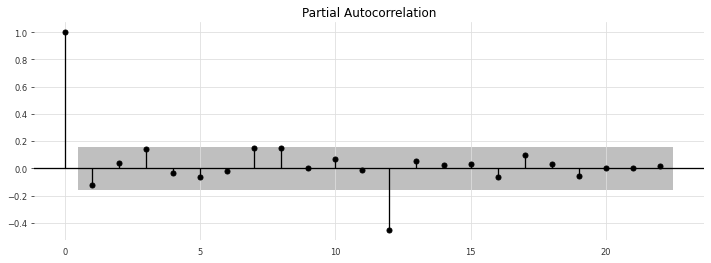

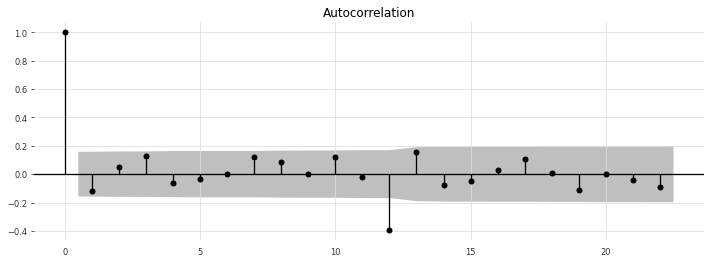

In [1307]:
_ = plot_pacf(res.resid)
_ = plot_acf(res.resid)

<AxesSubplot:xlabel='month'>

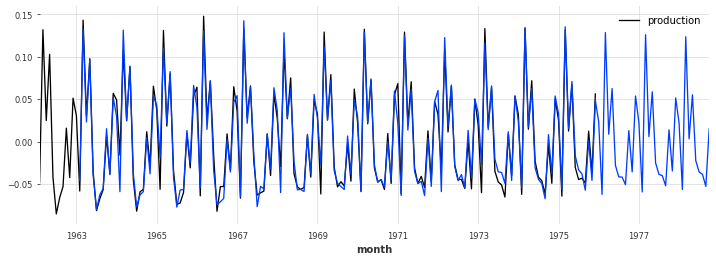

In [1308]:
milk_d.plot()
res.predict(0, 200).plot()

<AxesSubplot:xlabel='month'>

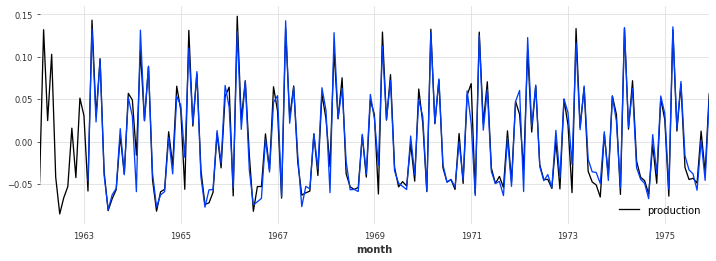

In [1309]:
milk_d.plot()
res.fittedvalues.plot()

<AxesSubplot:xlabel='month'>

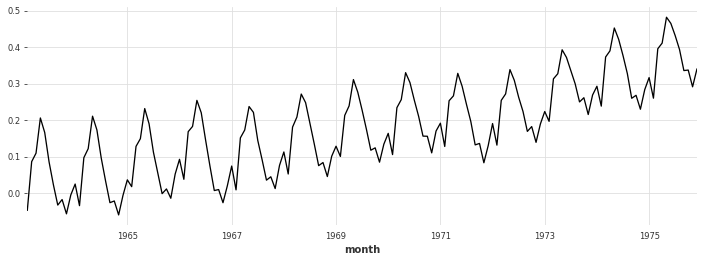

In [1310]:
# milk.plot()
pd.Series(res.fittedvalues).cumsum().plot()

<AxesSubplot:xlabel='month'>

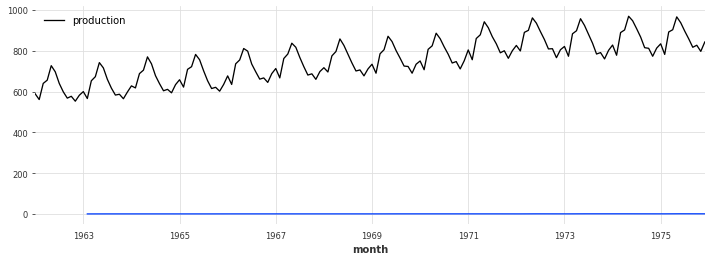

In [1311]:
milk.plot()
np.exp(pd.Series(np.log(milk).iloc[0], index=milk.index).add(pd.Series(res.fittedvalues).cumsum(), fill_value=0)).plot()

In [1312]:
np.exp(pd.Series(np.log(milk).iloc[0], index=milk.index).add(pd.Series(res.fittedvalues).cumsum(), fill_value=0)).isna().sum()

13

<AxesSubplot:xlabel='month'>

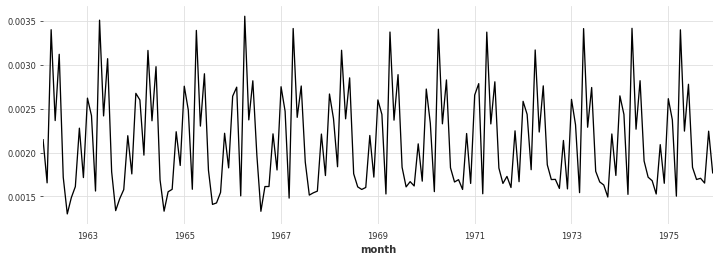

In [1340]:
m = ARMA(milk_d, order=(1,0))
res = m.fit(disp=0)
res.fittedvalues.plot()

In [1326]:
m = ARIMA(x_train['production'], order=(12,0,0))
res = m.fit()

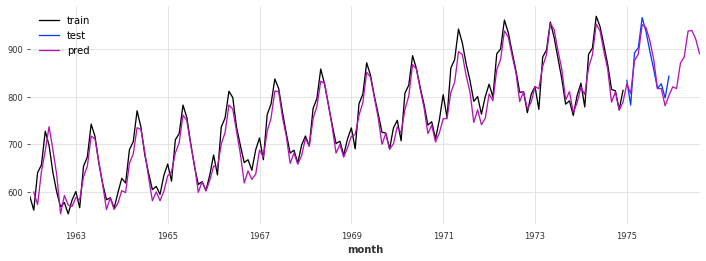

In [1327]:
x_train['production'].plot()
x_test['production'].plot()
res.predict(1,175).plot()
plt.legend(['train', 'test', 'pred'])

<AxesSubplot:xlabel='month'>

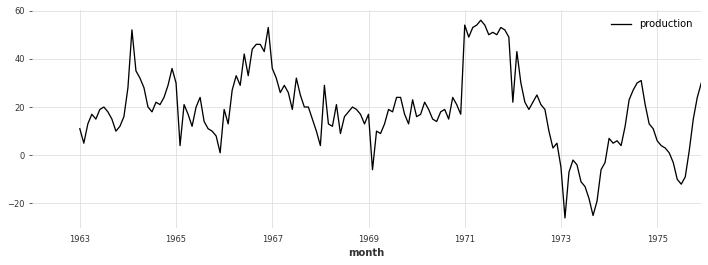

In [1328]:
milk.diff(12).plot()

# Darts

In [1197]:
import pandas as pd
from darts import TimeSeries

series = TimeSeries.from_dataframe(milk.reset_index(), 'month', 'production')

train, val = series[:-36], series[-36:]

In [1198]:
from darts.models import ExponentialSmoothing
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=100)

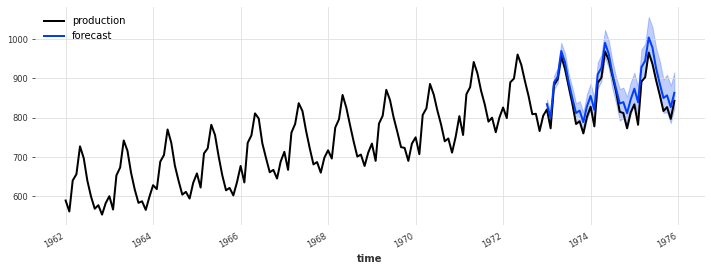

In [1199]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [1265]:
from darts.models.forecasting.arima import ARIMA
from darts.models.forecasting.auto_arima import AutoARIMA


In [1286]:
model = ARIMA(p=14, d=0, q=0)

In [1287]:
model.fit(train)

In [1288]:
prediction = model.predict(len(val), num_samples=1000)

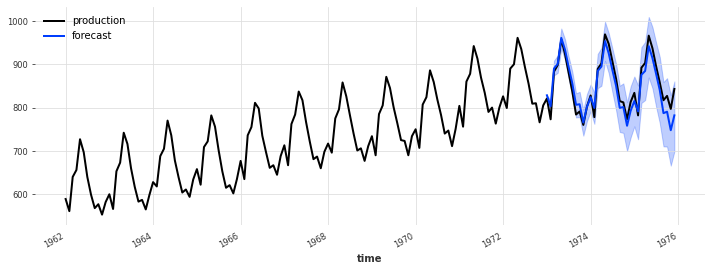

In [1289]:
series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [1280]:
model = AutoARIMA(start_p=1, max_p=15, start_d=1, max_d=3, start_q=1, max_q=4)

In [1262]:
model.fit(train)

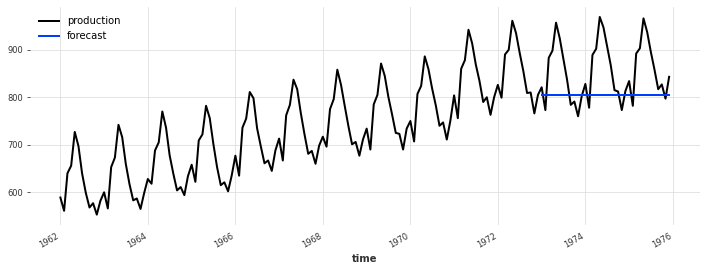

In [1263]:
prediction = model.predict(len(val))
series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [1343]:
# Create an AR model and find best value of p
model = AutoReg(milk, lags=13)
model_fit = model.fit()
print(model_fit.summary())


                            AutoReg Model Results                             
Dep. Variable:             production   No. Observations:                  168
Model:                    AutoReg(13)   Log Likelihood                -550.843
Method:               Conditional MLE   S.D. of innovations              8.456
Date:                Fri, 10 Dec 2021   AIC                              4.463
Time:                        03:30:45   BIC                              4.758
Sample:                    02-01-1963   HQIC                             4.583
                         - 12-01-1975                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         11.4273      6.896      1.657      0.098      -2.089      24.943
production.L1      0.8309      0.046     18.211      0.000       0.741       0.920
production.L2      0.0250      0.028

In [1345]:
# Create an MA model and find best value of q
milk_diff = milk.diff(periods=12).dropna()
model = AutoReg(milk_diff, lags=13)
model_fit = model.fit()
print(model_fit.summary())



                            AutoReg Model Results                             
Dep. Variable:             production   No. Observations:                  156
Model:                    AutoReg(13)   Log Likelihood                -489.528
Method:               Conditional MLE   S.D. of innovations              7.421
Date:                Fri, 10 Dec 2021   AIC                              4.218
Time:                        03:31:38   BIC                              4.529
Sample:                    02-01-1964   HQIC                             4.345
                         - 12-01-1975                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          2.6894      1.252      2.148      0.032       0.236       5.143
production.L1      0.7042      0.076      9.258      0.000       0.555       0.853
production.L2      0.2690      0.091

In [1346]:
# Create an ARIMA model and find best values of p,d,q
model = ARIMA(milk, order=(13,1,13))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  168
Model:               ARIMA(13, 1, 13)   Log Likelihood                -596.200
Date:                Fri, 10 Dec 2021   AIC                           1246.400
Time:                        03:32:00   BIC                           1330.586
Sample:                    01-01-1962   HQIC                          1280.569
                         - 12-01-1975                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1051      0.351     -0.299      0.765      -0.793       0.583
ar.L2         -0.0468      0.071     -0.660      0.509      -0.186       0.092
ar.L3         -0.0413      0.068     -0.608      0.5

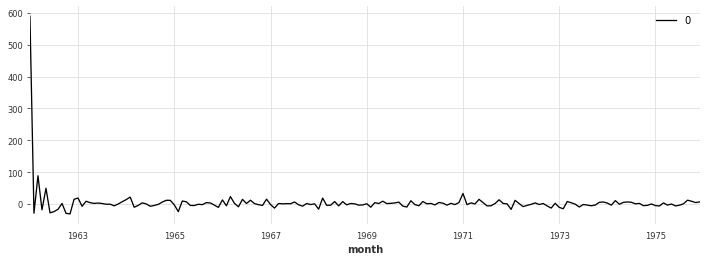

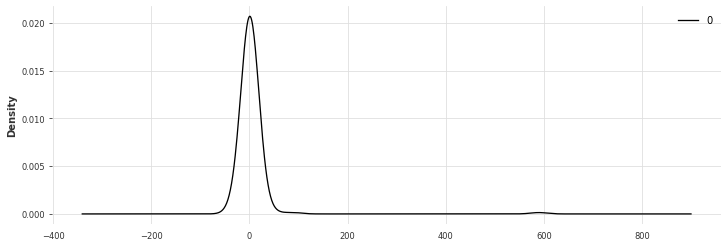

                0
count  168.000000
mean     4.666829
std     46.942960
min    -30.634114
25%     -3.885322
50%      1.052415
75%      5.153353
max    589.000000


In [1347]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

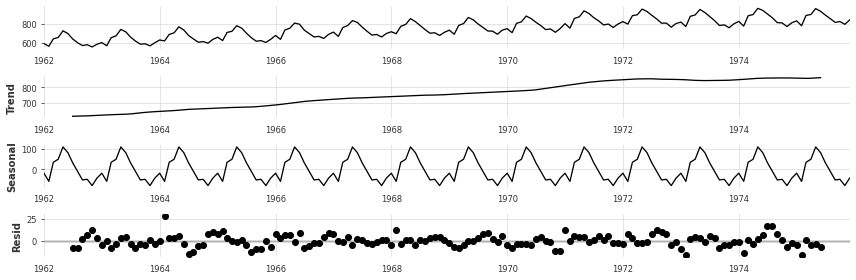

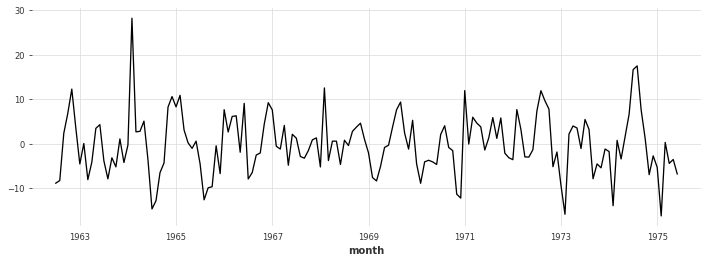

In [1348]:
decomposition = seasonal_decompose(milk)
decomposition.plot()
plt.show()

# residual
residual = decomposition.resid
residual.plot()
plt.show()


In [1350]:
adfuller(residual.dropna())

(-4.353371183750371,
 0.000358609930180248,
 11,
 144,
 {'1%': -3.476597917537401,
  '5%': -2.8818291230495543,
  '10%': -2.5775887982253085},
 898.6384672062907)

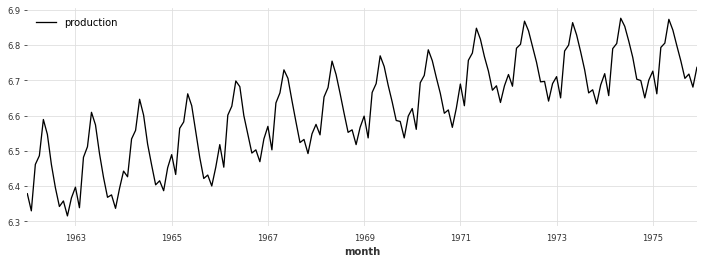

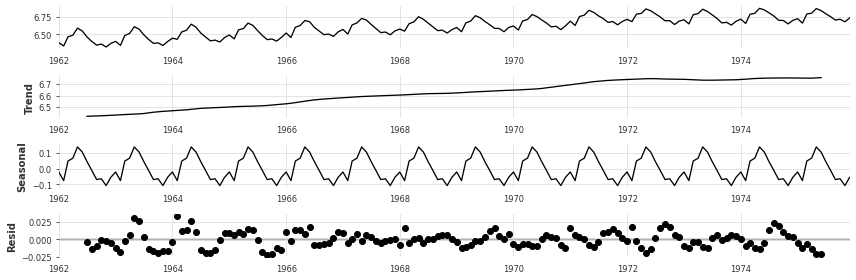

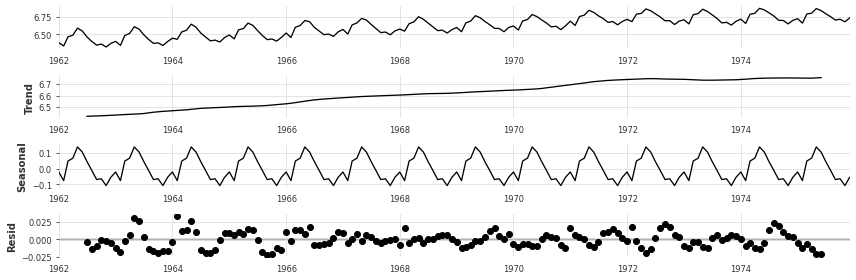

In [1354]:
milk_log = np.log(milk)
milk_log.plot()
plt.show()

# decompose the time series into trend, seasonality and residual
decomposition = seasonal_decompose(milk_log)
decomposition.plot()

In [1355]:
adfuller(milk_log)

(-1.7547966295111095,
 0.4031234023354883,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 -898.7573616698751)

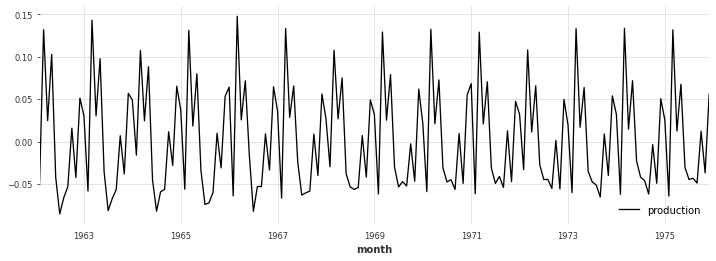

(-2.9066334238689766,
 0.044582040407215785,
 12,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 -891.3948747677152)

In [1359]:
# make the data stationary through transform
milk_log_diff = milk_log - milk_log.shift()
milk_log_diff.dropna(inplace=True)
milk_log_diff.plot()
plt.show()

# check for stationarity
adfuller(milk_log_diff.dropna())

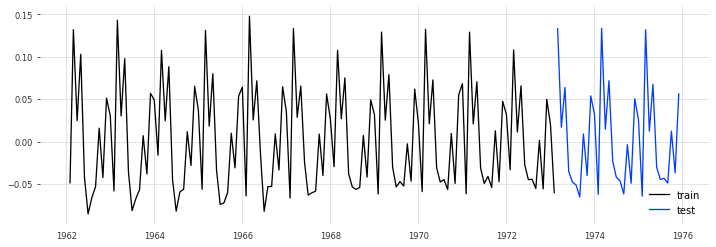

Coefficients: intercept        0.002336
production.L1    0.036939
dtype: float64


In [1360]:
# split the data into train and test
train = milk_log_diff[:int(0.8*(len(milk_log_diff)))]
test = milk_log_diff[int(0.8*(len(milk_log_diff))):]

# plot the data
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.legend()
plt.show()

# fit the model
model = AutoReg(train, lags=1)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


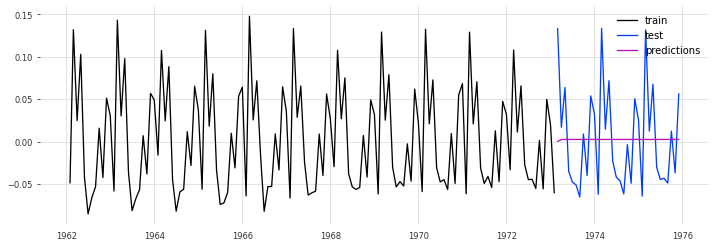

In [1362]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions = predictions.to_frame(name='predictions')

# plot the predictions
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

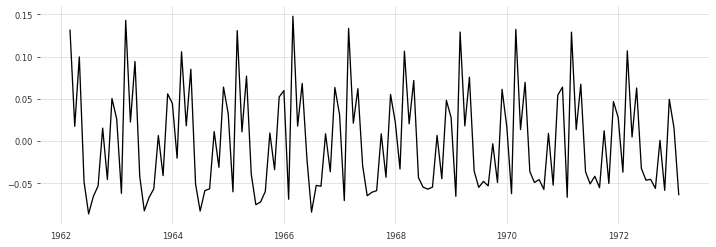

In [1376]:
plt.plot(model_fit.resid)

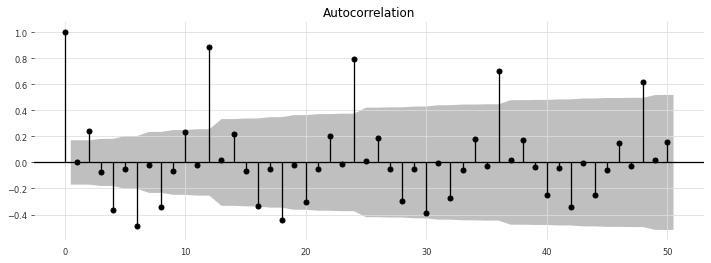

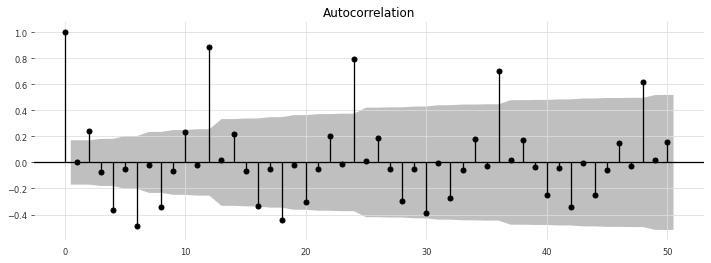

In [1377]:
plot_acf(model_fit.resid, lags=50)

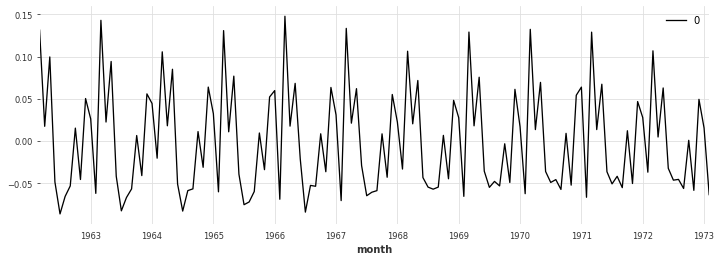

In [1378]:
# plot the residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

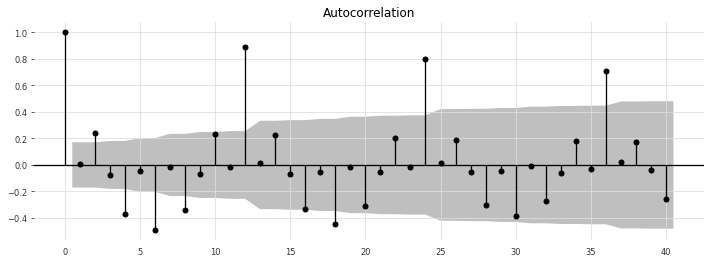

In [1379]:
_ = plot_acf(residuals, lags=40)

In [1386]:
predicted = model_fit.fittedvalues
predicted = np.exp(predicted)

<AxesSubplot:xlabel='month'>

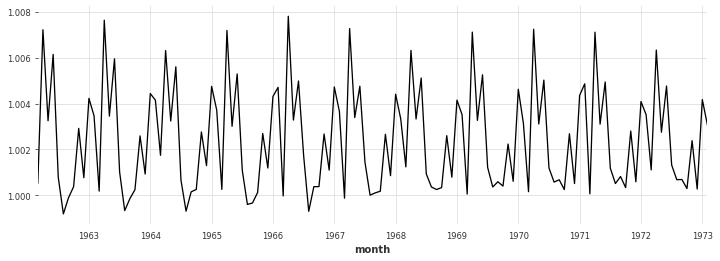

In [1387]:
predicted.plot()

<AxesSubplot:xlabel='month'>

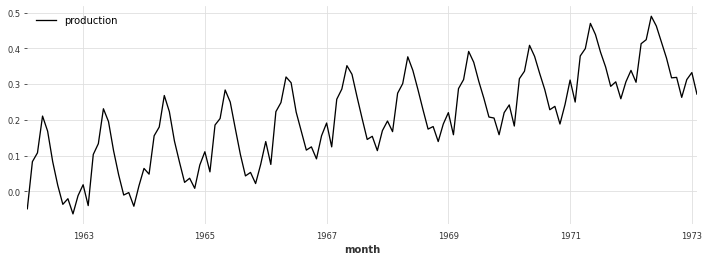

In [1388]:
actual = np.cumsum(train)
actual.plot()

In [1390]:
actual.iloc[-1]

production    0.271853
Name: 1973-02-01 00:00:00, dtype: float64

In [1391]:
predicted = predicted/actual.iloc[-1]*actual.iloc[-1]

<AxesSubplot:>

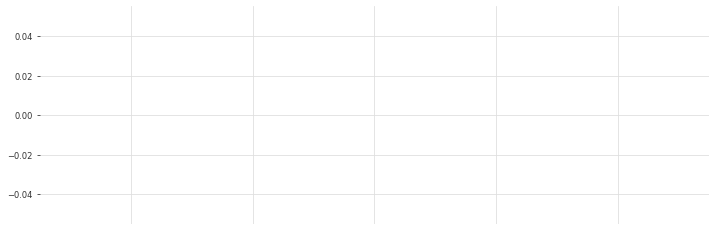

In [1394]:
predicted.dropna().plot()

In [1395]:
m = auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                start_P=0, seasonal=True, d=1, D=1, trace=True, 
                error_action='ignore',   # don't want to know if an order does not work
                suppress_warnings=True,  # don't want convergence warnings
                stepwise=True)           # set to stepwise
m.fit(train)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-716.003, Time=0.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-579.342, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-654.893, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-709.027, Time=0.27 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-688.557, Time=0.28 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-711.585, Time=0.49 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=-713.500, Time=1.05 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-707.584, Time=0.44 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=1.49 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-666.942, Time=0.22 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=-713.414, Time=0.60 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-711.110, Time=0.96 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-624.197, Time=0.21 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-716.760, Time=0.51 sec
 ARIMA(0,1,2)(0,1,0)[12]

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [1418]:
m = auto_arima(train, start_p=1, start_q=0, max_p=15, max_q=0, m=0,
                start_P=0, seasonal=False, d=1, max_d=5, D=0, trace=True, 
                error_action='ignore',   # don't want to know if an order does not work
                suppress_warnings=True,  # don't want convergence warnings
                stepwise=True)           # set to stepwise
model = m.fit(train)

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-331.589, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-273.447, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-275.447, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-332.092, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-332.468, Time=0.11 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-350.291, Time=0.15 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-348.318, Time=0.21 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=-352.277, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-334.460, Time=0.06 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=-350.304, Time=0.11 sec

Best model:  ARIMA(4,1,0)(0,0,0)[0]          
Total fit time: 0.945 seconds


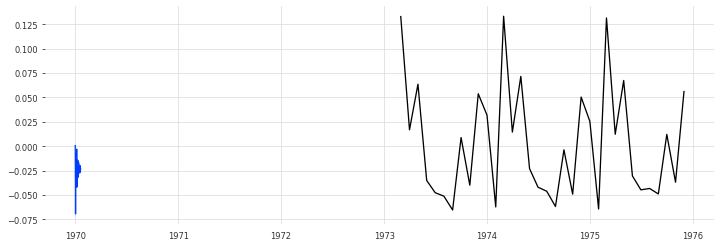

In [1422]:
plt.plot(test)
plt.plot(model.predict(20))

In [1402]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  133
Model:               SARIMAX(4, 1, 0)   Log Likelihood                 181.139
Date:                Fri, 10 Dec 2021   AIC                           -352.277
Time:                        03:57:46   BIC                           -337.863
Sample:                             0   HQIC                          -346.420
                                - 133                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6189      0.107     -5.804      0.000      -0.828      -0.410
ar.L2         -0.0584      0.131     -0.445      0.656      -0.316       0.199
ar.L3         -0.1167      0.102     -1.141      0.254      -0.317       0.084
ar.L4         -0.3845      0.125     -3.076      0.002      -0.629      -0.140
sigma2         0.0037      0.001      4.976      0.000       0.002       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.89
Prob(Q):                              1.00   Prob(JB):                         0.24
Heteroskedasticity (H):               0.76   Skew:                             0.20
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

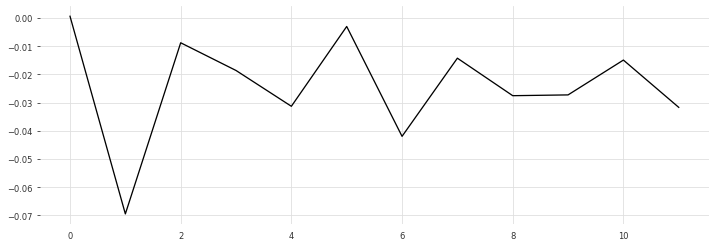

In [1405]:
plt.plot(model.predict(12))

<AxesSubplot:>

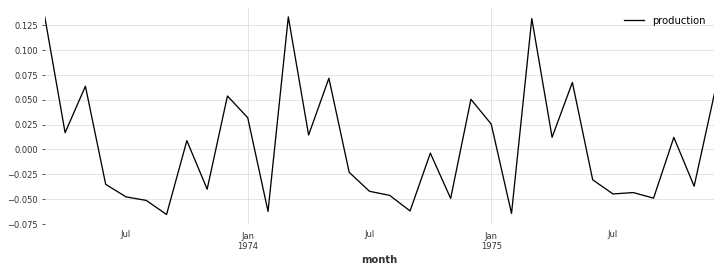

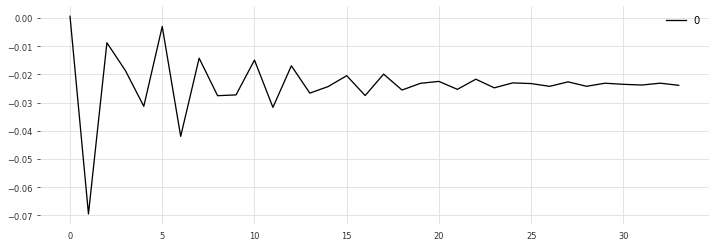

In [1410]:
test.plot()
predictions = model.predict(n_periods=len(test))
predictions = pd.DataFrame(predictions)
predictions.plot()


In [1416]:
m = auto_arima(train, start_p=1, start_q=1, max_p=10, max_q=10, m=0,
                start_P=0, seasonal=False, d=0, max_d=0, D=0, trace=True, 
                error_action='ignore',   # don't want to know if an order does not work
                suppress_warnings=True,  # don't want convergence warnings
                stepwise=True)           # set to stepwise
model = m.fit(train)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-360.945, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-364.714, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-362.909, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-362.845, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-362.863, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.264 seconds
